In [ ]:
# Libs for Data Treatment and Vizualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Libs for Metrics imports
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Global Model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data collection

In [ ]:
# Dataset path
file_path = '/content/drive/MyDrive/Colab Notebooks/(Researchs)/IC - Pessoal/1 - Modelos (Datasets do INMET de Sorocaba e região)/Datasets/Estacao_A713 - Sorocaba_Ipero/INMET_SE_SP_A713_SOROCABA_IPERO-Dataset_01-01-2023_A_31-12-2023.CSV'

# Upload CSV file into DataFrame
df = pd.read_csv(file_path, encoding='latin-1', sep=';', decimal=',')

In [ ]:
print("Dataframe format:")
print(f" ↪Linhas: {df.shape[0]} \n ↪Colunas: {df.shape[1]}")

print("\n---\n")

print("First 5 lines of the dataset:")
df.head()

Dataframe format:
 ↪Linhas: 8760 
 ↪Colunas: 20

---

First 5 lines of the dataset:


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,0000 UTC,0.0,946.8,946.8,946.1,NaN,21.4,19.3,22.1,21.4,19.5,19.0,88,83,88,64,3.1,1.8,NaN
1,2023/01/01,0100 UTC,0.0,947.2,947.3,946.8,NaN,20.5,18.9,21.4,20.5,19.4,18.7,90,88,90,203,2.9,0.7,NaN
2,2023/01/01,0200 UTC,0.0,946.9,947.4,946.9,NaN,20.9,19.2,20.9,20.4,19.2,18.9,91,89,90,203,1.7,0.1,NaN
3,2023/01/01,0300 UTC,0.0,946.3,947.0,946.3,NaN,19.8,18.6,21.1,19.8,19.3,18.4,93,88,93,183,0.8,0.0,NaN
4,2023/01/01,0400 UTC,0.0,945.5,946.3,945.5,NaN,19.9,18.6,20.0,19.6,18.9,18.5,94,92,92,115,1.9,0.9,NaN


In [ ]:
# Data general info
print("General Dataset Information:")
print(df.info())

General Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   8760 non-null   object 
 1   Hora UTC                                               8760 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       8759 non-null   float64
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  8760 non-null   float64
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        8760 non-null   float64
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       8760 non-null   float64
 6   RADIACAO GLOBAL (Kj/m²)                                4717 non-null   float64
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           8760 non-null   float64
 8   TEMPERATURA DO PONT

In [ ]:
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
count,8759.000000,8760.000000,8760.000000,8760.000000,4717.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,0.0
mean,0.165635,946.700103,946.966233,946.434155,1421.047276,21.138653,15.779064,21.873710,20.436279,16.383219,15.213550,77.415753,71.224201,74.359018,183.620548,2.029475,0.528550,NaN
std,1.276997,3.714636,3.679728,3.739907,1094.599868,5.179185,3.573687,5.301524,5.058027,3.525236,3.645587,16.616353,18.817387,17.858720,85.728000,2.953847,1.293609,NaN
min,0.000000,934.200000,934.600000,933.700000,0.000000,6.000000,1.400000,6.400000,5.300000,2.800000,0.300000,21.000000,15.000000,18.000000,1.000000,0.000000,0.000000,NaN
25%,0.000000,944.100000,944.500000,943.900000,365.100000,17.800000,13.100000,18.300000,17.200000,13.700000,12.500000,67.000000,57.000000,62.000000,120.000000,0.100000,0.000000,NaN
50%,0.000000,946.700000,947.000000,946.400000,1312.200000,20.700000,16.300000,21.300000,20.200000,16.900000,15.800000,83.000000,76.000000,80.000000,175.000000,0.600000,0.000000,NaN
75%,0.000000,949.400000,949.600000,949.100000,2346.200000,24.600000,18.800000,25.500000,23.700000,19.300000,18.300000,91.000000,87.000000,89.000000,247.000000,2.800000,0.100000,NaN
max,37.000000,959.200000,959.200000,959.000000,4238.300000,37.600000,22.800000,37.700000,37.000000,23.600000,22.500000,97.000000,97.000000,97.000000,360.000000,25.400000,8.700000,NaN


## Data Pre-Processing

In [ ]:
# --------------------
# Data Pre-Processing
# --------------------

# Removing 'UTC' from the time column
df['Hora UTC'] = df['Hora UTC'].str.replace(' UTC', '')

# Convert the UTC format to datetime format (only hour and minute)
df['Hora Datetime'] = pd.to_datetime(df['Hora UTC'], format='%H%M').dt.time

# Joining "Data" and "Hora Datetime" columns to create a "Data e Hora Datetime" column
df['Data e Hora (datetime)'] = df['Data'] + ' ' + df['Hora Datetime'].astype(str)

# Convert the "Data e Hora (datetime)" column to Datetime type
df['Data e Hora (datetime)'] = pd.to_datetime(df['Data e Hora (datetime)'])

df['Data e Hora (datetime)'].head()

,Data e Hora (datetime)
0,2023-01-01 00:00:00
1,2023-01-01 01:00:00
2,2023-01-01 02:00:00
3,2023-01-01 03:00:00
4,2023-01-01 04:00:00


In [ ]:
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Hora Datetime,Data e Hora (datetime)
0,2023/01/01,0000,0.0,946.8,946.8,946.1,NaN,21.4,19.3,22.1,...,19.0,88,83,88,64,3.1,1.8,NaN,00:00:00,2023-01-01 00:00:00
1,2023/01/01,0100,0.0,947.2,947.3,946.8,NaN,20.5,18.9,21.4,...,18.7,90,88,90,203,2.9,0.7,NaN,01:00:00,2023-01-01 01:00:00
2,2023/01/01,0200,0.0,946.9,947.4,946.9,NaN,20.9,19.2,20.9,...,18.9,91,89,90,203,1.7,0.1,NaN,02:00:00,2023-01-01 02:00:00
3,2023/01/01,0300,0.0,946.3,947.0,946.3,NaN,19.8,18.6,21.1,...,18.4,93,88,93,183,0.8,0.0,NaN,03:00:00,2023-01-01 03:00:00
4,2023/01/01,0400,0.0,945.5,946.3,945.5,NaN,19.9,18.6,20.0,...,18.5,94,92,92,115,1.9,0.9,NaN,04:00:00,2023-01-01 04:00:00


In [ ]:
# Removing "Data", "Hora UTC", "Hora Datetime" columns and one with no values
df = df.drop(columns=['Data', 'Hora UTC', 'Hora Datetime', 'Unnamed: 19'])
# df.head() # Displaying the head after dropping is not needed as it will be shown after inserting the column

# Changing the position of the "Data e Hora Datetime" column in the dataframe
column = 'Data e Hora (datetime)'
removed_column = df.pop(column)          # remove the column
df.insert(0, column, removed_column)     # insert the column in the new position

# Display the DataFrame format and the resulting DataFrame
print("DataFrame format:")
print(df.shape)

df.head()

DataFrame format:
(8760, 18)


,Data e Hora (datetime),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2023-01-01 00:00:00,0.0,946.8,946.8,946.1,NaN,21.4,19.3,22.1,21.4,19.5,19.0,88,83,88,64,3.1,1.8
1,2023-01-01 01:00:00,0.0,947.2,947.3,946.8,NaN,20.5,18.9,21.4,20.5,19.4,18.7,90,88,90,203,2.9,0.7
2,2023-01-01 02:00:00,0.0,946.9,947.4,946.9,NaN,20.9,19.2,20.9,20.4,19.2,18.9,91,89,90,203,1.7,0.1
3,2023-01-01 03:00:00,0.0,946.3,947.0,946.3,NaN,19.8,18.6,21.1,19.8,19.3,18.4,93,88,93,183,0.8,0.0
4,2023-01-01 04:00:00,0.0,945.5,946.3,945.5,NaN,19.9,18.6,20.0,19.6,18.9,18.5,94,92,92,115,1.9,0.9


In [ ]:
# Indexing of the 'Datetime' Date and Time
df.set_index('Data e Hora (datetime)', inplace=True)

df.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data e Hora (datetime),,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.0,946.8,946.8,946.1,NaN,21.4,19.3,22.1,21.4,19.5,19.0,88,83,88,64,3.1,1.8
2023-01-01 01:00:00,0.0,947.2,947.3,946.8,NaN,20.5,18.9,21.4,20.5,19.4,18.7,90,88,90,203,2.9,0.7
2023-01-01 02:00:00,0.0,946.9,947.4,946.9,NaN,20.9,19.2,20.9,20.4,19.2,18.9,91,89,90,203,1.7,0.1
2023-01-01 03:00:00,0.0,946.3,947.0,946.3,NaN,19.8,18.6,21.1,19.8,19.3,18.4,93,88,93,183,0.8,0.0
2023-01-01 04:00:00,0.0,945.5,946.3,945.5,NaN,19.9,18.6,20.0,19.6,18.9,18.5,94,92,92,115,1.9,0.9


In [ ]:
# Check missing values
print("Amount of missing values per column:")
print(df.isnull().sum())

print("\n --- \n")

print("Percentage of missing values:")
print(df.isnull().mean() * 100)

Amount of missing values per column:
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            1
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (Kj/m²)                                  4043
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)       

In [ ]:
# Fill in missing values with the median
df['RADIACAO GLOBAL (Kj/m²)'] = df['RADIACAO GLOBAL (Kj/m²)'].fillna(df['RADIACAO GLOBAL (Kj/m²)'].median())

In [ ]:
# Fill missing value in 'total precipitation, time (mm)' performing the interpolation
for column in df.columns:
  if column == 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':
    df[column] = df[column].interpolate(method='linear')  # Interpolação linear

In [ ]:
# Check missing values
print("Amount of missing values per column:")
print(df.isnull().sum())

print("\n --- \n")

print("Percentage of missing values:")
print(df.isnull().mean() * 100)

Amount of missing values per column:
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                     0
VENTO, RAJADA MAXIMA (m/s)                               0
VENTO, VELOCIDADE H

Checking the main features visually

In [ ]:
# Filters the data by interval
df_intervalo = df.loc['2023-01-01 00:00:00':'2023-02-28 00:00:00']

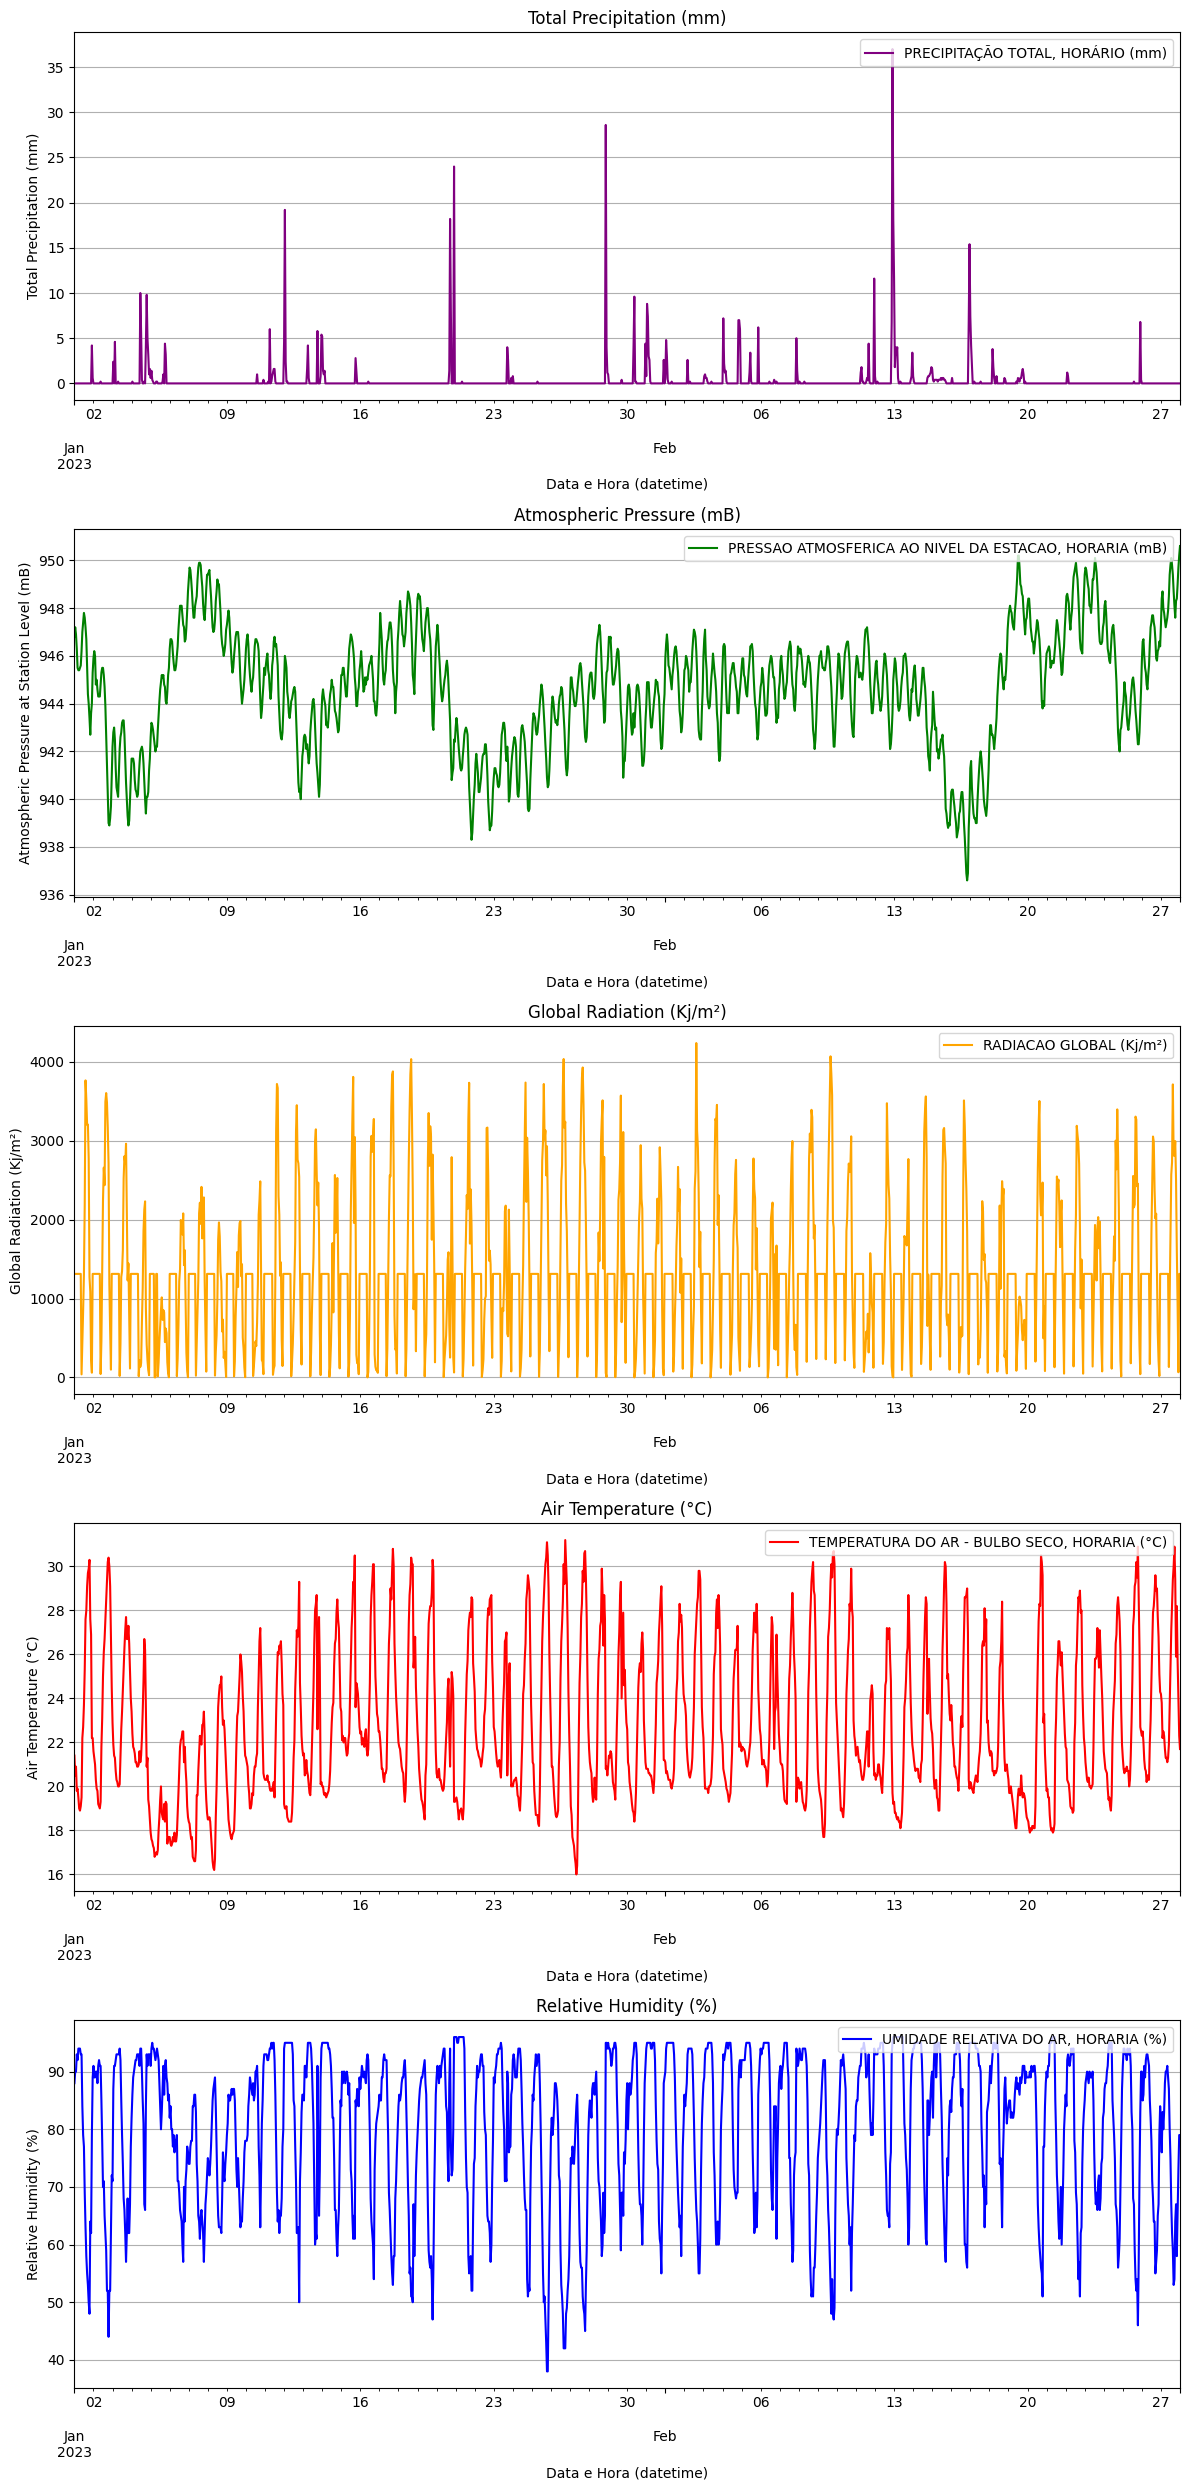

In [ ]:
# ------------------------------------
# For January and February only
# ------------------------------------

# Creating subplots manually with adjustments
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 25), gridspec_kw={'height_ratios': [5, 5, 5, 5, 5]})       # `height_ratios` defines the relative heights of the subplots

# Adding plots individually
df_intervalo.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', ax=axes[0], color='purple', legend=True, title='Total Precipitation (mm)')
df_intervalo.plot(y='PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', ax=axes[1], color='green', legend=True, title='Atmospheric Pressure (mB)')
df_intervalo.plot(y='RADIACAO GLOBAL (Kj/m²)', ax=axes[2], color='orange', legend=True, title='Global Radiation (Kj/m²)')
df_intervalo.plot(y='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', ax=axes[3], color='red', legend=True, title='Air Temperature (°C)')
df_intervalo.plot(y='UMIDADE RELATIVA DO AR, HORARIA (%)', ax=axes[4], color='blue', legend=True, title='Relative Humidity (%)')

# Iterate over each subplot
for ax in axes:
  ax.grid(axis='y')             # Activate grid for the y-axis
  ax.legend(loc='upper right')  # Move legend to the upper right corner

# Adjusting axis labels
axes[0].set_ylabel('Total Precipitation (mm)')
axes[1].set_ylabel('Atmospheric Pressure at Station Level (mB)')
axes[2].set_ylabel('Global Radiation (Kj/m²)')
axes[3].set_ylabel('Air Temperature (°C)')
axes[4].set_ylabel('Relative Humidity (%)')
#axes[3].set_xlabel('Date and Time')  # Only the last plot needs an X-axis label

# Adjusting spacing between plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

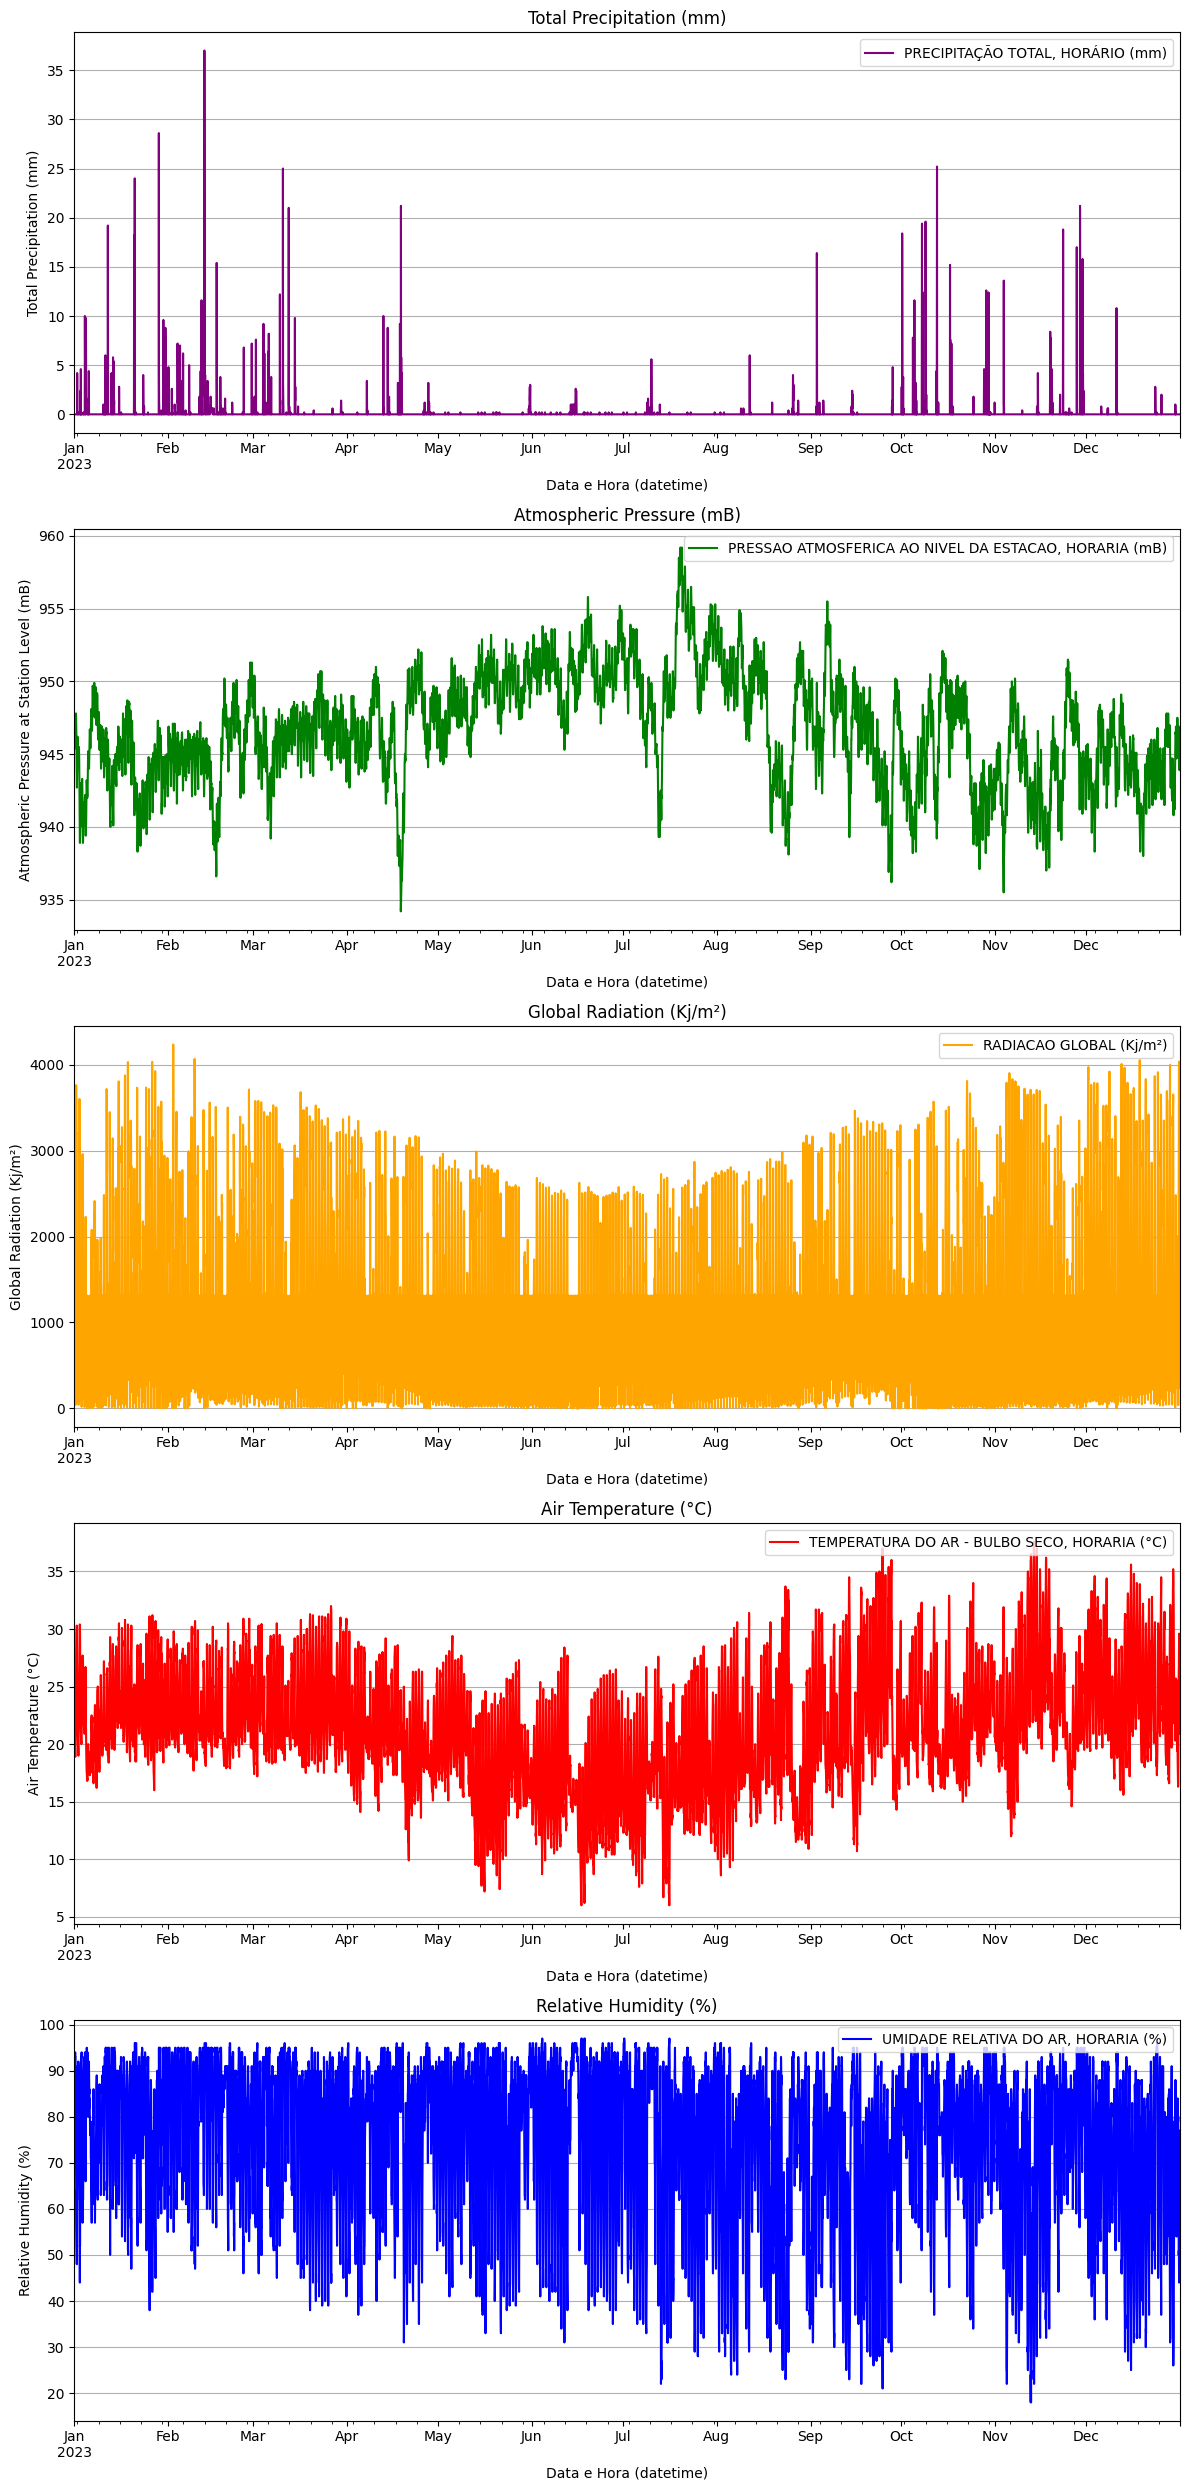

In [ ]:
# ------------------------------------
# For All period
# ------------------------------------

# Creating subplots manually with adjustments
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 25), gridspec_kw={'height_ratios': [5, 5, 5, 5, 5]})       # `height_ratios` defines the relative heights of the subplots

# Adding plots individually
df.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', ax=axes[0], color='purple', legend=True, title='Total Precipitation (mm)')
df.plot(y='PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', ax=axes[1], color='green', legend=True, title='Atmospheric Pressure (mB)')
df.plot(y='RADIACAO GLOBAL (Kj/m²)', ax=axes[2], color='orange', legend=True, title='Global Radiation (Kj/m²)')
df.plot(y='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', ax=axes[3], color='red', legend=True, title='Air Temperature (°C)')
df.plot(y='UMIDADE RELATIVA DO AR, HORARIA (%)', ax=axes[4], color='blue', legend=True, title='Relative Humidity (%)')

# Iterate over each subplot
for ax in axes:
  ax.grid(axis='y')             # Activate grid for the y-axis
  ax.legend(loc='upper right')  # Move legend to the upper right corner

# Adjusting axis labels
axes[0].set_ylabel('Total Precipitation (mm)')
axes[1].set_ylabel('Atmospheric Pressure at Station Level (mB)')
axes[2].set_ylabel('Global Radiation (Kj/m²)')
axes[3].set_ylabel('Air Temperature (°C)')
axes[4].set_ylabel('Relative Humidity (%)')
#axes[3].set_xlabel('Date and Time')  # Only the last plot needs an X-axis label

# Adjusting spacing between plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Target feature

In [ ]:
# ----------------------------------------------------------------------
# Creating the Target feature 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'
# ----------------------------------------------------------------------

df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'] = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].shift(-1)

# Shift the new target column to the beginning of the DataFrame
target_column = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'
removed_target_column = df.pop(target_column)
df.insert(0, target_column, removed_target_column)

# Remove NaN value from target
df.dropna(subset=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'], inplace=True)

df.tail()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data e Hora (datetime),,,,,,,,,,,,,,,,,,
2023-12-31 18:00:00,0.0,0.0,944.3,944.8,944.2,3318.6,29.3,16.9,30.6,28.1,17.2,15.3,47,41,47,121,1.3,0.3
2023-12-31 19:00:00,0.0,0.0,943.9,944.3,943.9,2869.1,27.5,17.3,29.4,27.4,18.1,15.8,55,45,54,138,10.0,5.8
2023-12-31 20:00:00,0.0,0.0,944.1,944.1,943.9,1812.9,26.3,17.0,27.5,26.2,17.8,16.6,57,53,57,142,8.8,4.5
2023-12-31 21:00:00,0.0,0.0,944.4,944.4,944.1,1079.6,24.6,16.8,26.6,24.6,17.3,16.6,62,56,62,133,9.1,5.7
2023-12-31 22:00:00,0.0,0.0,944.9,945.0,944.4,234.9,22.1,16.8,24.6,22.1,17.0,16.5,72,62,72,163,10.0,4.1


Spliting into X(samples) and y(target)

In [ ]:
# ----------------------
# Spliting into X and y
# ----------------------

X = df.drop(columns=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'])
y = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (8759, 17)
y shape:  (8759,)


## Implementing Sliding Window

> Given the dataset have 8760 samples the training will delay too much to finish!!!

Since that, we will adopt a Sliding Window method: https://medium.com/@data-overload/sliding-window-technique-reduce-the-complexity-of-your-algorithm-5badb2cf432f

In [ ]:
# --------------------
# Sliding Window
# --------------------

WINDOW_SIZE = 168   # 168 hours (1 week)
STRIDE = 10

windows_X = []
windows_y = []

SEQUENCE_LENGTH = X.shape[0]
FEATURES_DIM = X.shape[1]

# --------------------------------------------
# Generating windows
# --------------------------------------------

for t in range(0, SEQUENCE_LENGTH - WINDOW_SIZE + 1, STRIDE):
    x_win = X.iloc[t : t + WINDOW_SIZE, :]
    y_val = y.iloc[t + WINDOW_SIZE - 1]  # target at window end
    windows_X.append(x_win)
    windows_y.append([y_val])

# ------------------------------
# Convert to final arrays
# ------------------------------

windows_X = np.array(windows_X)
windows_y = np.array(windows_y)

# Shapes
print("windows_X shape:", windows_X.shape)  # (N, WINDOW_SIZE, FEATURES_DIM)
print("windows_y shape:", windows_y.shape)  # (N, 1)

windows_X shape: (860, 168, 17)
windows_y shape: (860, 1)


## Data Splitting and Data Normalization

In [ ]:
# --------------------------------------------
# Splitting data into Train, Val and Test sets
# --------------------------------------------

from sklearn.model_selection import train_test_split

TRAINING_RATIO = 0.7
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.15
if (TRAINING_RATIO + VALIDATION_RATIO + TEST_RATIO) != 1.0:
  raise ValueError("The sum of the ratios must be equal to 1.0!!!")

# Set the Train sets
train_X, temp_X, train_y, temp_y = train_test_split(
    windows_X, windows_y, test_size=(1-TRAINING_RATIO), random_state=42, shuffle=False
)
# Set the Val and Test sets
val_fraction = VALIDATION_RATIO / (VALIDATION_RATIO + TEST_RATIO)
val_X, test_X, val_y, test_y = train_test_split(
    temp_X, temp_y, test_size=(1 - val_fraction), random_state=42, shuffle=False
)

# Verifying partitions
print(f"Training set: ---> X: {train_X.shape}, y: {train_y.shape}")
print(f"Validation set: --> X: {val_X.shape}, y: {val_y.shape}")
print(f"Test set: ---------> X: {test_X.shape}, y: {test_y.shape}")

# Ensuring 'float32' data type to input in Keras framework
train_X = train_X.astype(np.float32)
train_y = train_y.astype(np.float32)
val_X = val_X.astype(np.float32)
val_y = val_y.astype(np.float32)
test_X = test_X.astype(np.float32)
test_y = test_y.astype(np.float32)

Training set: ---> X: (601, 168, 17), y: (601, 1)
Validation set: --> X: (129, 168, 17), y: (129, 1)
Test set: ---------> X: (130, 168, 17), y: (130, 1)


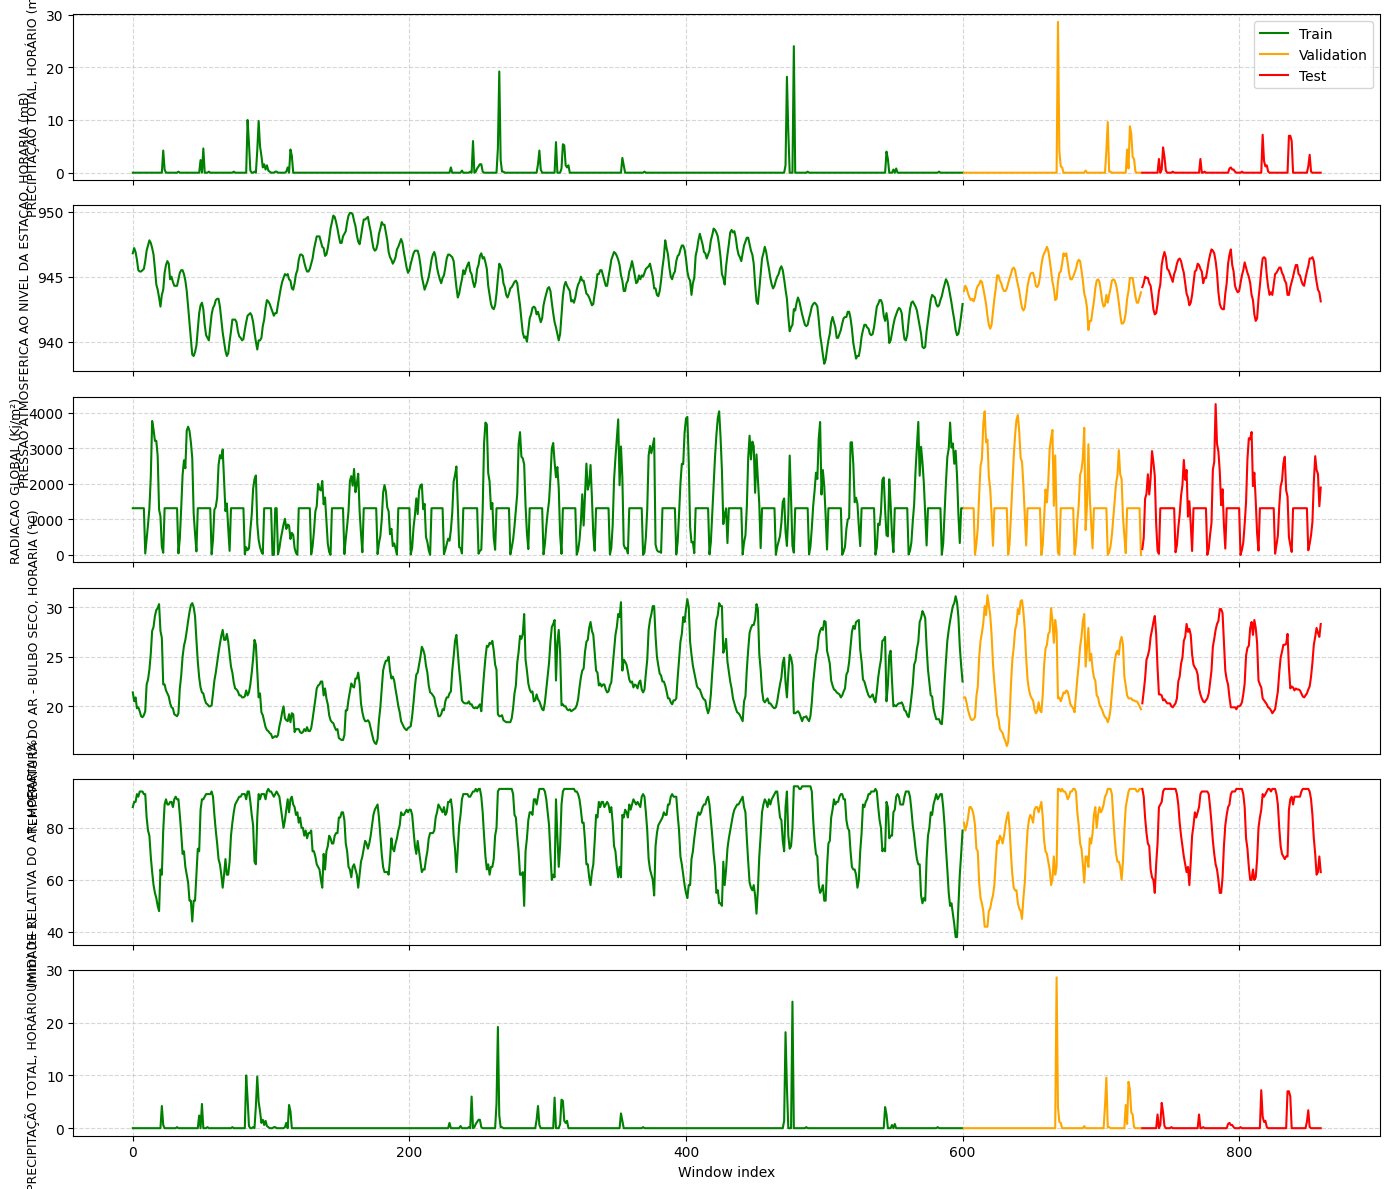

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Columns to plot (last one is the target)
cols_to_show = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'
]

# We need the corresponding original dataframe for these columns
# Suppose "df" is aligned with your windows start positions
n_total = len(windows_X)  # number of windows

# Train/val/test lengths from your split
train_len = len(train_X)
val_len = len(val_X)
test_len = len(test_X)

# Figure setup
fig, axes = plt.subplots(len(cols_to_show), 1, figsize=(14, 2 * len(cols_to_show)), sharex=True)

# Plot each column
for idx, col in enumerate(cols_to_show):
    ax = axes[idx] if len(cols_to_show) > 1 else axes

    # Index mapping for windows: we plot by window start index
    # Train
    ax.plot(range(0, train_len), df[col].iloc[0:train_len], color='green', label='Train' if idx == 0 else "")
    # Validation
    ax.plot(range(train_len, train_len + val_len), df[col].iloc[train_len:train_len+val_len],
            color='orange', label='Validation' if idx == 0 else "")
    # Test
    ax.plot(range(train_len + val_len, train_len + val_len + test_len),
            df[col].iloc[train_len + val_len:train_len + val_len + test_len],
            color='red', label='Test' if idx == 0 else "")

    ax.set_ylabel(col, fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)

# Legend only in first subplot
axes[0].legend(loc='upper right')

plt.xlabel("Window index")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------
# Normalization
# ---------------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler

batch_size, sequence_length, features_dim = train_X.shape

# Scaling the target data
y_scaler = StandardScaler()
train_y_scaled = y_scaler.fit_transform(train_y)
val_y_scaled = y_scaler.transform(val_y)
test_y_scaled = y_scaler.transform(test_y)
windows_y_scaled = y_scaler.transform(windows_y)

# Scaling the samples data
x_scaler = StandardScaler()
train_X_scaled = x_scaler.fit_transform(train_X.reshape(-1, train_X.shape[-1])).reshape(train_X.shape)
val_X_scaled = x_scaler.transform(val_X.reshape(-1, val_X.shape[-1])).reshape(val_X.shape)
test_X_scaled = x_scaler.transform(test_X.reshape(-1, features_dim)).reshape(test_X.shape)
windows_X_scaled = x_scaler.transform(windows_X.reshape(-1, features_dim)).reshape(windows_X.shape)

# Showing an example for the normalization in the element [0]
print(f'train_X: {train_X[0]}')
print(f'train_X_scaled: {train_X_scaled[0]}\n')
print(f'train_y: {train_y[0]}')
print(f'train_y_scaled: {train_y_scaled[0]}')

train_X: [[0.000e+00 9.468e+02 9.468e+02 ... 6.400e+01 3.100e+00 1.800e+00]
 [0.000e+00 9.472e+02 9.473e+02 ... 2.030e+02 2.900e+00 7.000e-01]
 [0.000e+00 9.469e+02 9.474e+02 ... 2.030e+02 1.700e+00 1.000e-01]
 ...
 [0.000e+00 9.481e+02 9.481e+02 ... 1.250e+02 1.080e+01 7.200e+00]
 [0.000e+00 9.488e+02 9.488e+02 ... 1.190e+02 1.080e+01 4.800e+00]
 [0.000e+00 9.494e+02 9.494e+02 ... 1.180e+02 9.200e+00 4.500e+00]]
train_X_scaled: [[-0.12517379 -0.25152716 -0.32405078 ... -1.4134547   0.55325097
   1.2716348 ]
 [-0.12517379 -0.13958564 -0.18309012 ...  0.20317048  0.47650915
   0.26536447]
 [-0.12517379 -0.22353324 -0.15488766 ...  0.20317048  0.01605784
  -0.28351024]
 ...
 [-0.12517379  0.11225715  0.04244349 ... -0.7040004   3.507814
   6.2115073 ]
 [-0.12517379  0.30814627  0.23979186 ... -0.77378285  3.507814
   4.016009  ]
 [-0.12517379  0.47605854  0.40895498 ... -0.7854132   2.8938785
   3.7415712 ]]

train_y: [0.]
train_y_scaled: [-0.12771747]


# DL Models

In [ ]:
# Libs for DL models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, Bidirectional, Dropout, Dense, ConvLSTM2D, Conv2D, Reshape, Conv1D
from tensorflow.keras.optimizers import Adam

In [ ]:
HIDDEN_SIZE = 64
LEARNING_RATE = 0.0005

window_size = train_X.shape[1]
features_dim = train_X.shape[2]

dl_models = {
    "LSTM": Sequential([
        Input(shape=(window_size, features_dim)),
        LSTM(HIDDEN_SIZE, activation="tanh", recurrent_dropout=0.2, return_sequences=True),
        LSTM(HIDDEN_SIZE, activation="tanh", return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ]),
    "GRU": Sequential([
        Input(shape=(window_size, features_dim)),
        GRU(HIDDEN_SIZE, activation="tanh", recurrent_dropout=0.2, return_sequences=True),
        GRU(HIDDEN_SIZE, activation="tanh", return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ]),

    "Bi-LSTM": Sequential([
        Input(shape=(window_size, features_dim)),
        Bidirectional(LSTM(HIDDEN_SIZE, activation="tanh", recurrent_dropout=0.2, return_sequences=True)),
        Bidirectional(LSTM(HIDDEN_SIZE, activation="tanh", return_sequences=False)),
        Dropout(0.2),
        Dense(1)
    ]),

    "Bi-GRU": Sequential([
        Input(shape=(window_size, features_dim)),
        Bidirectional(GRU(HIDDEN_SIZE, activation="tanh", recurrent_dropout=0.2, return_sequences=True)),
        Bidirectional(GRU(HIDDEN_SIZE, activation="tanh", return_sequences=False)),
        Dropout(0.2),
        Dense(1)
    ]),

    # ConvLSTM — needs 5D input: (samples, timesteps, rows, cols, channels)
    "ConvLSTM": Sequential([
        Reshape((window_size, 1, features_dim, 1), input_shape=(window_size, features_dim)),
        ConvLSTM2D(filters=32, kernel_size=(1,3), activation="tanh", padding="same", return_sequences=True),
        Dropout(0.2),
        ConvLSTM2D(filters=16, kernel_size=(1,3), activation="tanh", padding="same", return_sequences=False),
        Dropout(0.2),
        # The output of ConvLSTM2D with return_sequences=False is 4D (batch, rows, cols, filters)
        # Need to flatten or pool before Dense layer for single value output per sample
        Reshape((-1,)), # Flatten the output
        Dense(1)
    ]),

    # ConvGRU — simulated using Conv1D + GRU
    "ConvGRU": Sequential([
        Conv1D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=(window_size, features_dim)),
        Dropout(0.2),
        GRU(HIDDEN_SIZE, activation="tanh", recurrent_dropout=0.2, return_sequences=True),
        GRU(HIDDEN_SIZE, activation="tanh", return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
}

# Compile and summarize
for name, model in dl_models.items():
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE, clipnorm=1.0),
        loss=tf.keras.losses.Huber(delta=1.5)
    )
    print(f"Model: {name}")
    model.summary()
    print("------------------------\n")

Model: LSTM


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 64)        │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,081 (211.25 KB)

 Trainable params: 54,081 (211.25 KB)

 Non-trainable params: 0 (0.00 B)

------------------------

Model: GRU


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 168, 64)        │        15,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961 (160.00 KB)

 Trainable params: 40,961 (160.00 KB)

 Non-trainable params: 0 (0.00 B)

------------------------

Model: Bi-LSTM


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 168, 128)       │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,929 (550.50 KB)

 Trainable params: 140,929 (550.50 KB)

 Non-trainable params: 0 (0.00 B)

------------------------

Model: Bi-GRU


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 168, 128)       │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,497 (416.00 KB)

 Trainable params: 106,497 (416.00 KB)

 Non-trainable params: 0 (0.00 B)

------------------------

Model: ConvLSTM


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 168, 1, 17, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d (ConvLSTM2D)        │ (None, 168, 1, 17, 32) │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 168, 1, 17, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 1, 17, 16)      │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 17, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 272)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,353 (87.32 KB)

 Trainable params: 22,353 (87.32 KB)

 Non-trainable params: 0 (0.00 B)

------------------------

Model: ConvGRU


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 168, 32)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 168, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 168, 64)        │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,505 (177.75 KB)

 Trainable params: 45,505 (177.75 KB)

 Non-trainable params: 0 (0.00 B)

------------------------



In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.backend import clear_session

EPOCHS = 100
BATCH_SIZE = 64

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True,
    verbose=2
)

def train_and_plot(model_name, dl_models, train_X, train_y, val_X, val_y):
    """
    Train a given model from dl_models dict and plot its training/validation loss.

    Args:
        model_name (str): Key name of the model in dl_models.
        dl_models (dict): Dictionary containing models.
        train_X, train_y: Training data.
        val_X, val_y: Validation data.

    Returns:
        history: training history object.
        model: trained keras model (can be used for prediction).
    """
    if model_name not in dl_models:
        raise ValueError(f"Model '{model_name}' not found in dl_models!")

    # clear_session()  # Uncomment if you want to reset the TF session each time
    model = dl_models[model_name]

    print(f"Training model: {model_name}")
    history = model.fit(
        train_X_scaled, train_y_scaled,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(val_X_scaled, val_y_scaled),
        callbacks=[early_stopping],
        verbose=2,
        shuffle=False
    )

    # Plot training vs validation loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Training loss")
    plt.plot(history.history["val_loss"], label="Validation loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.title(f"Loss - {model_name}")
    plt.grid(True)
    plt.legend()
    plt.show()

    return history, model

Training model: LSTM
Epoch 1/100
10/10 - 6s - 649ms/step - loss: 0.1552 - val_loss: 0.1909
Epoch 2/100
10/10 - 2s - 194ms/step - loss: 0.1540 - val_loss: 0.1769
Epoch 3/100
10/10 - 3s - 256ms/step - loss: 0.1511 - val_loss: 0.1770
Epoch 4/100
10/10 - 2s - 188ms/step - loss: 0.1469 - val_loss: 0.1782
Epoch 5/100
10/10 - 4s - 351ms/step - loss: 0.1462 - val_loss: 0.1754
Epoch 6/100
10/10 - 4s - 407ms/step - loss: 0.1466 - val_loss: 0.1761
Epoch 7/100
10/10 - 2s - 182ms/step - loss: 0.1460 - val_loss: 0.1772
Epoch 8/100
10/10 - 2s - 178ms/step - loss: 0.1448 - val_loss: 0.1761
Epoch 9/100
10/10 - 3s - 305ms/step - loss: 0.1438 - val_loss: 0.1771
Epoch 10/100
10/10 - 2s - 246ms/step - loss: 0.1426 - val_loss: 0.1774
Epoch 11/100
10/10 - 2s - 196ms/step - loss: 0.1435 - val_loss: 0.1774
Epoch 12/100
10/10 - 3s - 255ms/step - loss: 0.1425 - val_loss: 0.1783
Epoch 13/100
10/10 - 2s - 241ms/step - loss: 0.1424 - val_loss: 0.1790
Epoch 14/100
10/10 - 2s - 172ms/step - loss: 0.1408 - val_loss: 0

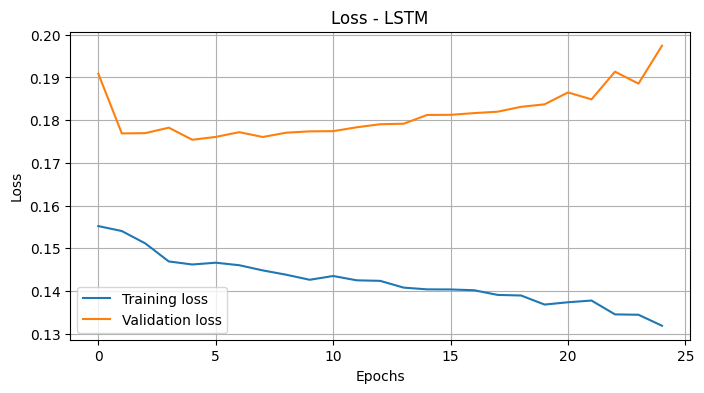

In [ ]:
# Train LSTM:
history_lstm, model_lstm = train_and_plot("LSTM", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

Training model: GRU
Epoch 1/100
10/10 - 7s - 701ms/step - loss: 0.1755 - val_loss: 0.1852
Epoch 2/100
10/10 - 2s - 209ms/step - loss: 0.1688 - val_loss: 0.1765
Epoch 3/100
10/10 - 2s - 197ms/step - loss: 0.1575 - val_loss: 0.1789
Epoch 4/100
10/10 - 2s - 195ms/step - loss: 0.1499 - val_loss: 0.1817
Epoch 5/100
10/10 - 2s - 192ms/step - loss: 0.1496 - val_loss: 0.1788
Epoch 6/100
10/10 - 3s - 253ms/step - loss: 0.1475 - val_loss: 0.1817
Epoch 7/100
10/10 - 3s - 301ms/step - loss: 0.1436 - val_loss: 0.1809
Epoch 8/100
10/10 - 2s - 210ms/step - loss: 0.1419 - val_loss: 0.1824
Epoch 9/100
10/10 - 2s - 190ms/step - loss: 0.1407 - val_loss: 0.1829
Epoch 10/100
10/10 - 3s - 252ms/step - loss: 0.1416 - val_loss: 0.1836
Epoch 11/100
10/10 - 3s - 305ms/step - loss: 0.1430 - val_loss: 0.1849
Epoch 12/100
10/10 - 2s - 241ms/step - loss: 0.1390 - val_loss: 0.1847
Epoch 13/100
10/10 - 2s - 220ms/step - loss: 0.1407 - val_loss: 0.1886
Epoch 14/100
10/10 - 2s - 249ms/step - loss: 0.1386 - val_loss: 0.

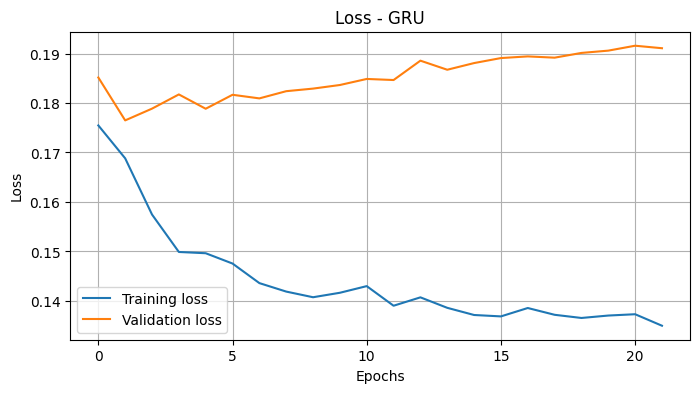

In [ ]:
# Train GRU:
history_gru, model_gru = train_and_plot("GRU", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

Training model: Bi-LSTM
Epoch 1/100
10/10 - 10s - 1s/step - loss: 0.1676 - val_loss: 0.2015
Epoch 2/100
10/10 - 4s - 417ms/step - loss: 0.1798 - val_loss: 0.1883
Epoch 3/100
10/10 - 5s - 503ms/step - loss: 0.1521 - val_loss: 0.1818
Epoch 4/100
10/10 - 6s - 616ms/step - loss: 0.1480 - val_loss: 0.1799
Epoch 5/100
10/10 - 10s - 1s/step - loss: 0.1462 - val_loss: 0.1797
Epoch 6/100
10/10 - 12s - 1s/step - loss: 0.1434 - val_loss: 0.1787
Epoch 7/100
10/10 - 5s - 538ms/step - loss: 0.1431 - val_loss: 0.1791
Epoch 8/100
10/10 - 6s - 595ms/step - loss: 0.1421 - val_loss: 0.1789
Epoch 9/100
10/10 - 9s - 923ms/step - loss: 0.1412 - val_loss: 0.1783
Epoch 10/100
10/10 - 6s - 593ms/step - loss: 0.1400 - val_loss: 0.1796
Epoch 11/100
10/10 - 11s - 1s/step - loss: 0.1406 - val_loss: 0.1801
Epoch 12/100
10/10 - 9s - 892ms/step - loss: 0.1394 - val_loss: 0.1802
Epoch 13/100
10/10 - 6s - 646ms/step - loss: 0.1377 - val_loss: 0.1817
Epoch 14/100
10/10 - 10s - 1s/step - loss: 0.1370 - val_loss: 0.1840
E

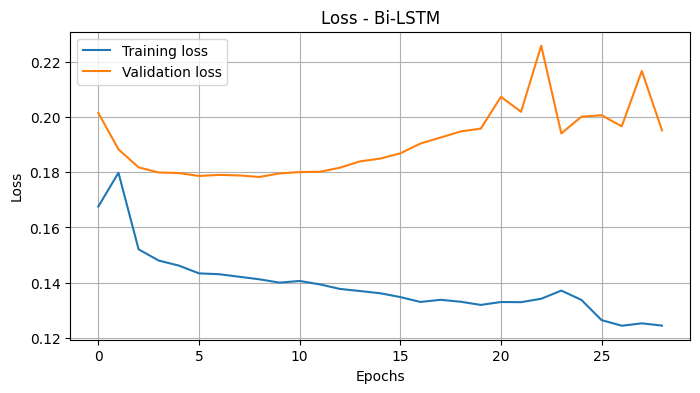

In [ ]:
# Train Bi-LSTM:
history_bi_lstm, model_bi_lstm = train_and_plot("Bi-LSTM", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

Training model: Bi-GRU
Epoch 1/100
10/10 - 14s - 1s/step - loss: 0.1805 - val_loss: 0.2312
Epoch 2/100
10/10 - 9s - 861ms/step - loss: 0.1950 - val_loss: 0.1856
Epoch 3/100
10/10 - 4s - 416ms/step - loss: 0.1684 - val_loss: 0.1808
Epoch 4/100
10/10 - 5s - 512ms/step - loss: 0.1532 - val_loss: 0.1786
Epoch 5/100
10/10 - 6s - 635ms/step - loss: 0.1487 - val_loss: 0.1856
Epoch 6/100
10/10 - 10s - 1s/step - loss: 0.1484 - val_loss: 0.1800
Epoch 7/100
10/10 - 9s - 903ms/step - loss: 0.1440 - val_loss: 0.1824
Epoch 8/100
10/10 - 5s - 531ms/step - loss: 0.1436 - val_loss: 0.1824
Epoch 9/100
10/10 - 10s - 1s/step - loss: 0.1400 - val_loss: 0.1851
Epoch 10/100
10/10 - 9s - 941ms/step - loss: 0.1422 - val_loss: 0.1852
Epoch 11/100
10/10 - 5s - 503ms/step - loss: 0.1378 - val_loss: 0.1878
Epoch 12/100
10/10 - 5s - 492ms/step - loss: 0.1401 - val_loss: 0.1857
Epoch 13/100
10/10 - 6s - 620ms/step - loss: 0.1392 - val_loss: 0.1885
Epoch 14/100
10/10 - 4s - 415ms/step - loss: 0.1401 - val_loss: 0.191

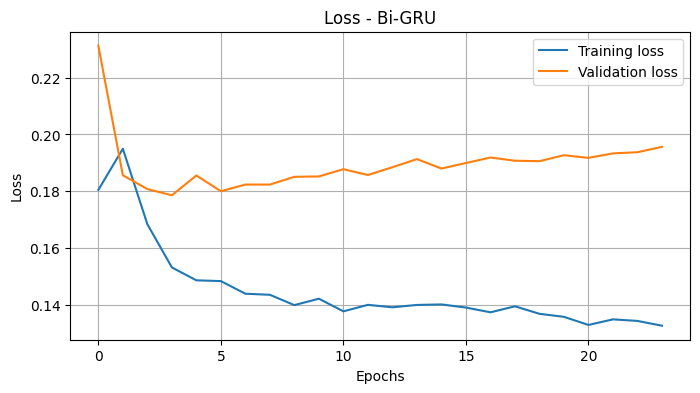

In [ ]:
# Train Bi-GRU:
history_bi_gru, model_bi_gru = train_and_plot("Bi-GRU", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

Training model: ConvLSTM
Epoch 1/100
10/10 - 14s - 1s/step - loss: 0.1555 - val_loss: 0.1781
Epoch 2/100
10/10 - 21s - 2s/step - loss: 0.1509 - val_loss: 0.1803
Epoch 3/100
10/10 - 10s - 1s/step - loss: 0.1497 - val_loss: 0.1778
Epoch 4/100
10/10 - 20s - 2s/step - loss: 0.1492 - val_loss: 0.1788
Epoch 5/100
10/10 - 10s - 1s/step - loss: 0.1472 - val_loss: 0.1786
Epoch 6/100
10/10 - 20s - 2s/step - loss: 0.1473 - val_loss: 0.1800
Epoch 7/100
10/10 - 21s - 2s/step - loss: 0.1463 - val_loss: 0.1790
Epoch 8/100
10/10 - 21s - 2s/step - loss: 0.1463 - val_loss: 0.1808
Epoch 9/100
10/10 - 20s - 2s/step - loss: 0.1460 - val_loss: 0.1789
Epoch 10/100
10/10 - 22s - 2s/step - loss: 0.1457 - val_loss: 0.1796
Epoch 11/100
10/10 - 21s - 2s/step - loss: 0.1459 - val_loss: 0.1788
Epoch 12/100
10/10 - 20s - 2s/step - loss: 0.1453 - val_loss: 0.1800
Epoch 13/100
10/10 - 20s - 2s/step - loss: 0.1441 - val_loss: 0.1798
Epoch 14/100
10/10 - 21s - 2s/step - loss: 0.1444 - val_loss: 0.1794
Epoch 15/100
10/10

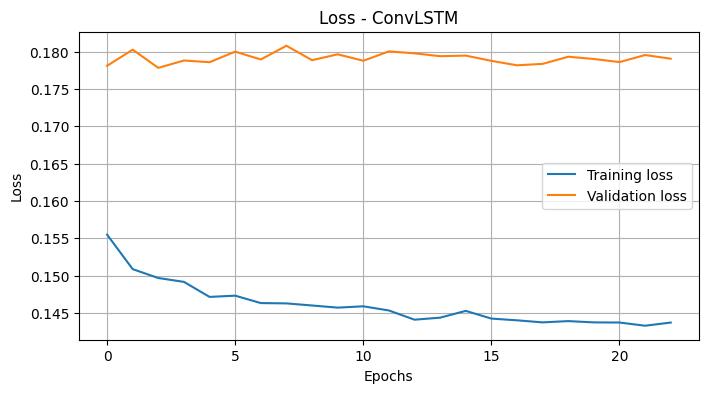

In [ ]:
# Train ConvLSTM:
history_ConvLSTM, model_ConvLSTM = train_and_plot("ConvLSTM", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

Training model: ConvGRU
Epoch 1/100
10/10 - 7s - 694ms/step - loss: 0.1621 - val_loss: 0.1823
Epoch 2/100
10/10 - 2s - 201ms/step - loss: 0.1548 - val_loss: 0.1914
Epoch 3/100
10/10 - 3s - 260ms/step - loss: 0.1565 - val_loss: 0.1802
Epoch 4/100
10/10 - 2s - 215ms/step - loss: 0.1513 - val_loss: 0.1793
Epoch 5/100
10/10 - 3s - 273ms/step - loss: 0.1454 - val_loss: 0.1770
Epoch 6/100
10/10 - 4s - 438ms/step - loss: 0.1451 - val_loss: 0.1760
Epoch 7/100
10/10 - 3s - 252ms/step - loss: 0.1446 - val_loss: 0.1777
Epoch 8/100
10/10 - 3s - 281ms/step - loss: 0.1417 - val_loss: 0.1772
Epoch 9/100
10/10 - 3s - 252ms/step - loss: 0.1402 - val_loss: 0.1795
Epoch 10/100
10/10 - 2s - 206ms/step - loss: 0.1411 - val_loss: 0.1821
Epoch 11/100
10/10 - 3s - 252ms/step - loss: 0.1408 - val_loss: 0.1801
Epoch 12/100
10/10 - 2s - 202ms/step - loss: 0.1411 - val_loss: 0.1804
Epoch 13/100
10/10 - 2s - 196ms/step - loss: 0.1391 - val_loss: 0.1798
Epoch 14/100
10/10 - 3s - 294ms/step - loss: 0.1399 - val_loss

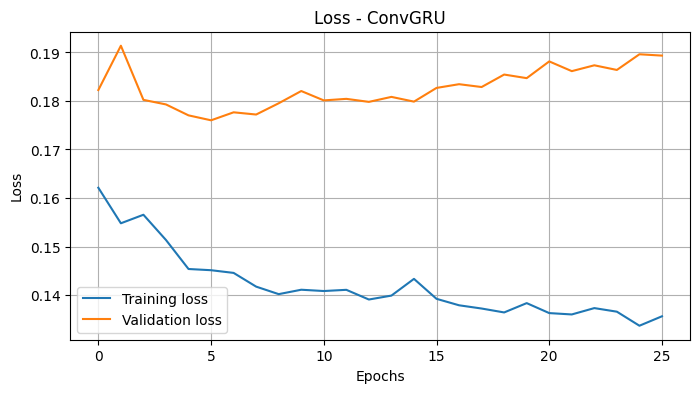

In [ ]:
# Train ConvGRU:
history_ConvGRU, model_ConvGRU = train_and_plot("ConvGRU", dl_models, train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def predict_models(dl_models, test_X_scaled, test_y_scaled):
  """
    Makes predictions with all models in dl_models, calculates R².

    Args:
        dl_models (dict): Dict of compiled Keras models.
        val_X, val_y: Test data.
    """


  results = {}

  # Adjust y_real to receive 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)'
  # combined_y = np.concatenate([train_y_scaled, val_y_scaled, test_y_scaled], axis=0)
  # y_val_test_real = y_scaler.inverse_transform(combined_y)
  y_val_test_real = y_scaler.inverse_transform(test_y_scaled)
  # Transform to unidimensional data
  y_real = y_val_test_real.flatten()

  for name, model in dl_models.items():
    print(f"... Predicting w/ model {name} ...")
    # ------------------------------------
    # Prediction for all windows and models
    # ------------------------------------
    # combined_X = np.concatenate([train_X_scaled, val_X_scaled, test_X_scaled], axis=0)
    # pred_y_scaled = model.predict(combined_X)
    pred_y_scaled = model.predict(test_X_scaled)
    # Inverse normalization
    y_pred = y_scaler.inverse_transform(pred_y_scaled)
    # Adjust prediction format
    y_pred = y_pred.flatten()  # make sure (n_janelas,)

    # Check data sizes
    assert y_real.shape == y_pred.shape, f"Shapes incompatíveis: y_real {y_real.shape}, y_pred {y_pred.shape}"

    window_indices = []

    for year in range(BATCH_SIZE):
        for t in range(0, SEQUENCE_LENGTH - WINDOW_SIZE + 1, STRIDE):
            window_indices.append((year, t + WINDOW_SIZE - 1))

    # ----------------------------------
    # Calculating and plotting metrics
    # ----------------------------------
    # R2 score:
    r2 = r2_score(y_real, y_pred)
    print(f"R² - {name}: {r2:.4f}")
    # MSE:
    mse = mean_squared_error(y_real, y_pred)
    print(f"MSE - {name}: {mse:.4f}")
    # RMSE:
    rmse = np.sqrt(mse)
    print(f"RMSE - {name}: {rmse:.4f}")
    # MAE:
    mae = mean_absolute_error(y_real, y_pred)
    print(f"MAE - {name}: {mae:.4f}")
    # RMAE:
    rmae = mae / np.mean(np.abs(y_real))
    print(f"RMAE - {name}: {rmae:.4f}")

    # Saving results
    results[name] = {
        "pred": y_pred,
        "real": y_real,
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "RMAE": rmae,
    }

  return results

In [ ]:
combined_X = np.concatenate([val_X_scaled, test_X_scaled], axis=0)
combined_y = np.concatenate([val_y_scaled, test_y_scaled], axis=0)

results = predict_models(dl_models, combined_X, combined_y)

... Predicting w/ model LSTM ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R² - LSTM: 0.0182
MSE - LSTM: 1.7492
RMSE - LSTM: 1.3226
MAE - LSTM: 0.2378
RMAE - LSTM: 1.3272
... Predicting w/ model GRU ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R² - GRU: 0.0488
MSE - GRU: 1.6948
RMSE - GRU: 1.3018
MAE - GRU: 0.2840
RMAE - GRU: 1.5854
... Predicting w/ model Bi-LSTM ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
R² - Bi-LSTM: 0.0294
MSE - Bi-LSTM: 1.7292
RMSE - Bi-LSTM: 1.3150
MAE - Bi-LSTM: 0.2570
RMAE - Bi-LSTM: 1.4346
... Predicting w/ model Bi-GRU ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
R² - Bi-GRU: 0.0136
MSE - Bi-GRU: 1.7574
RMSE - Bi-GRU: 1.3257
MAE - Bi-GRU: 0.2333
RMAE - Bi-GRU: 1.3021
... Predicting w/ model ConvLSTM ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step
R² - ConvLSTM: 0.0013
MSE - ConvLSTM: 1.7793
RMSE - ConvLSTM: 1.3339
MAE - ConvLSTM: 0.2472
RMAE - ConvLSTM: 1.3798
... Predicting w/ model ConvGRU ...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² - ConvGRU: 0.0393
MSE - ConvGRU: 1.7116

In [ ]:
combined_X.shape

(259, 168, 17)

In [ ]:
print(results.keys())

dict_keys(['LSTM', 'GRU', 'Bi-LSTM', 'Bi-GRU', 'ConvLSTM', 'ConvGRU'])


In [ ]:
# --------------------------------------
# Verifying the best results
# --------------------------------------
best_model_name = min(results, key=lambda model_name: results[model_name]['MAE'])  # lowest MAE
print(f"Best model predction: {best_model_name}")

# To get the actual metrics or predictions for that best model:
best_metrics = results[best_model_name]
print(f"Best MAE: {best_metrics['MAE']:.4f}")

# To get predictions:
best_preds = best_metrics['pred']

Best model predction: Bi-GRU
Best MAE: 0.2333


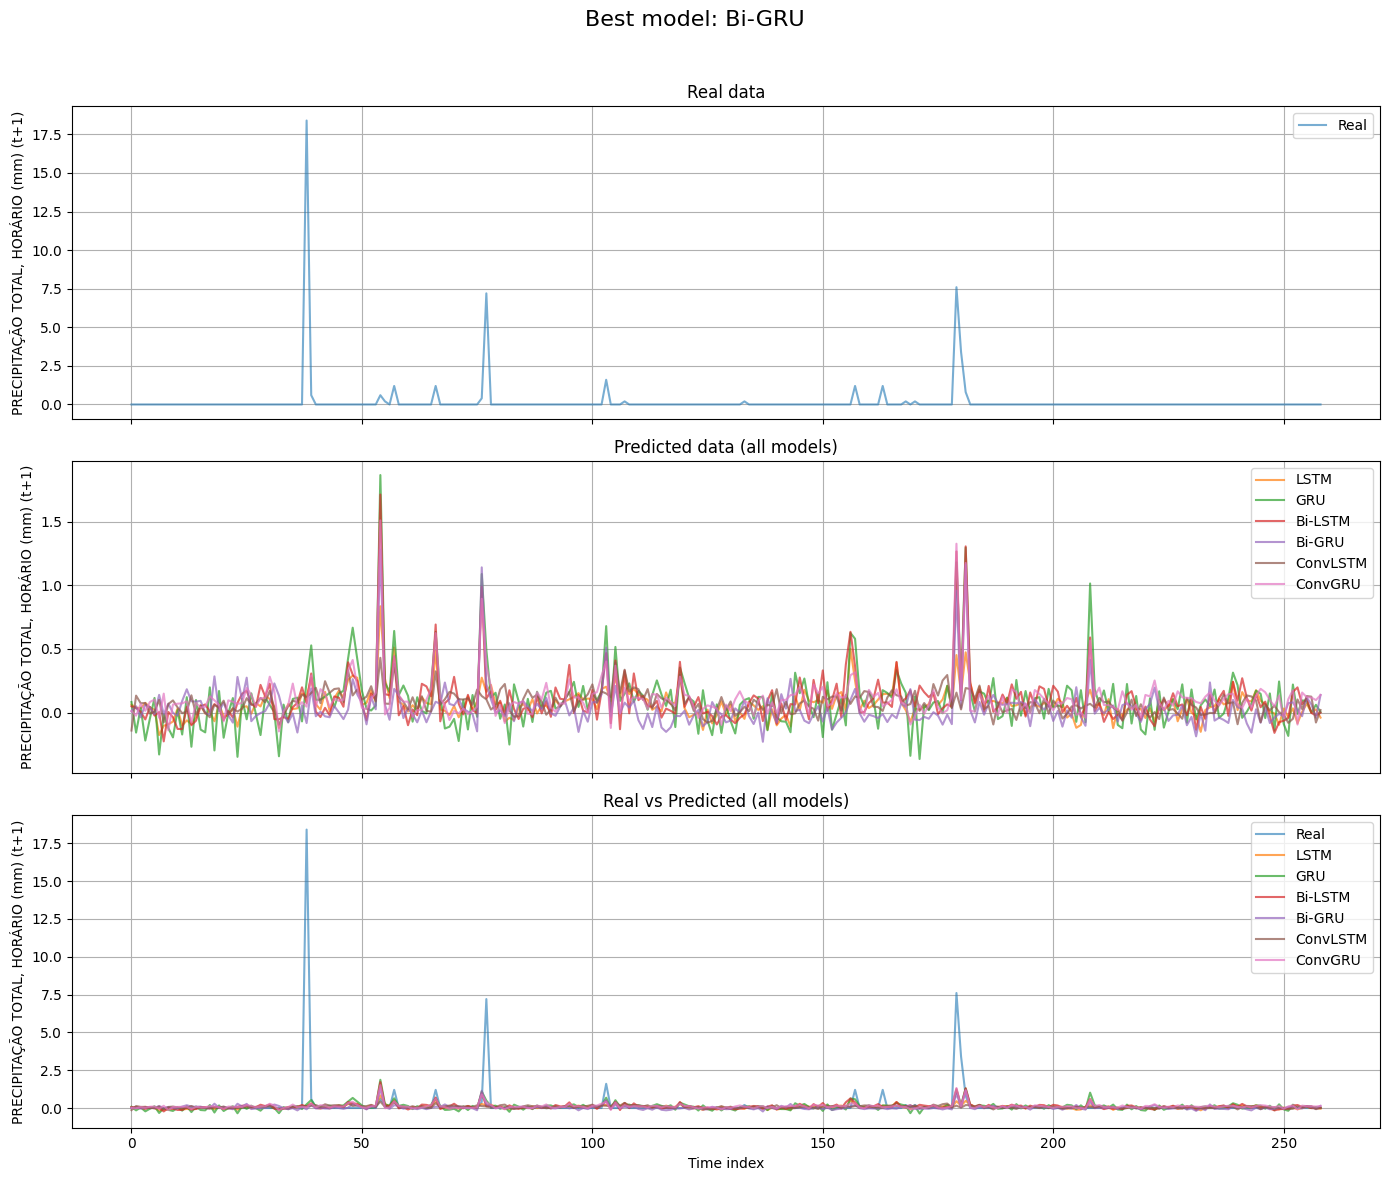

In [ ]:
# Select compatible colors automatically
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
real_color = colors[0]

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'Best model: {best_model_name}', fontsize=16)

# Real values graph
axs[0].plot(results[best_model_name]["real"], label='Real', alpha=0.6, color=real_color)
axs[0].set_title('Real data')
axs[0].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[0].legend()
axs[0].grid(True)

# Predicted values graph — plot all models predictions
for i, (model_name, metrics) in enumerate(results.items()):
    color = colors[(i + 1) % len(colors)]  # skip colors[0] which is real_color
    axs[1].plot(metrics['pred'], label=model_name, alpha=0.7, color=color)
axs[1].set_title('Predicted data (all models)')
axs[1].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Real x predicted comparison graph — overlay all predictions on real data
axs[2].plot(results[best_model_name]["real"], label='Real', alpha=0.6, color=real_color)
for i, (model_name, metrics) in enumerate(results.items()):
    color = colors[(i + 1) % len(colors)]
    axs[2].plot(metrics['pred'], label=model_name, alpha=0.7, color=color)
axs[2].set_title('Real vs Predicted (all models)')
axs[2].set_xlabel('Time index')
axs[2].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[2].legend(loc='upper right')
axs[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


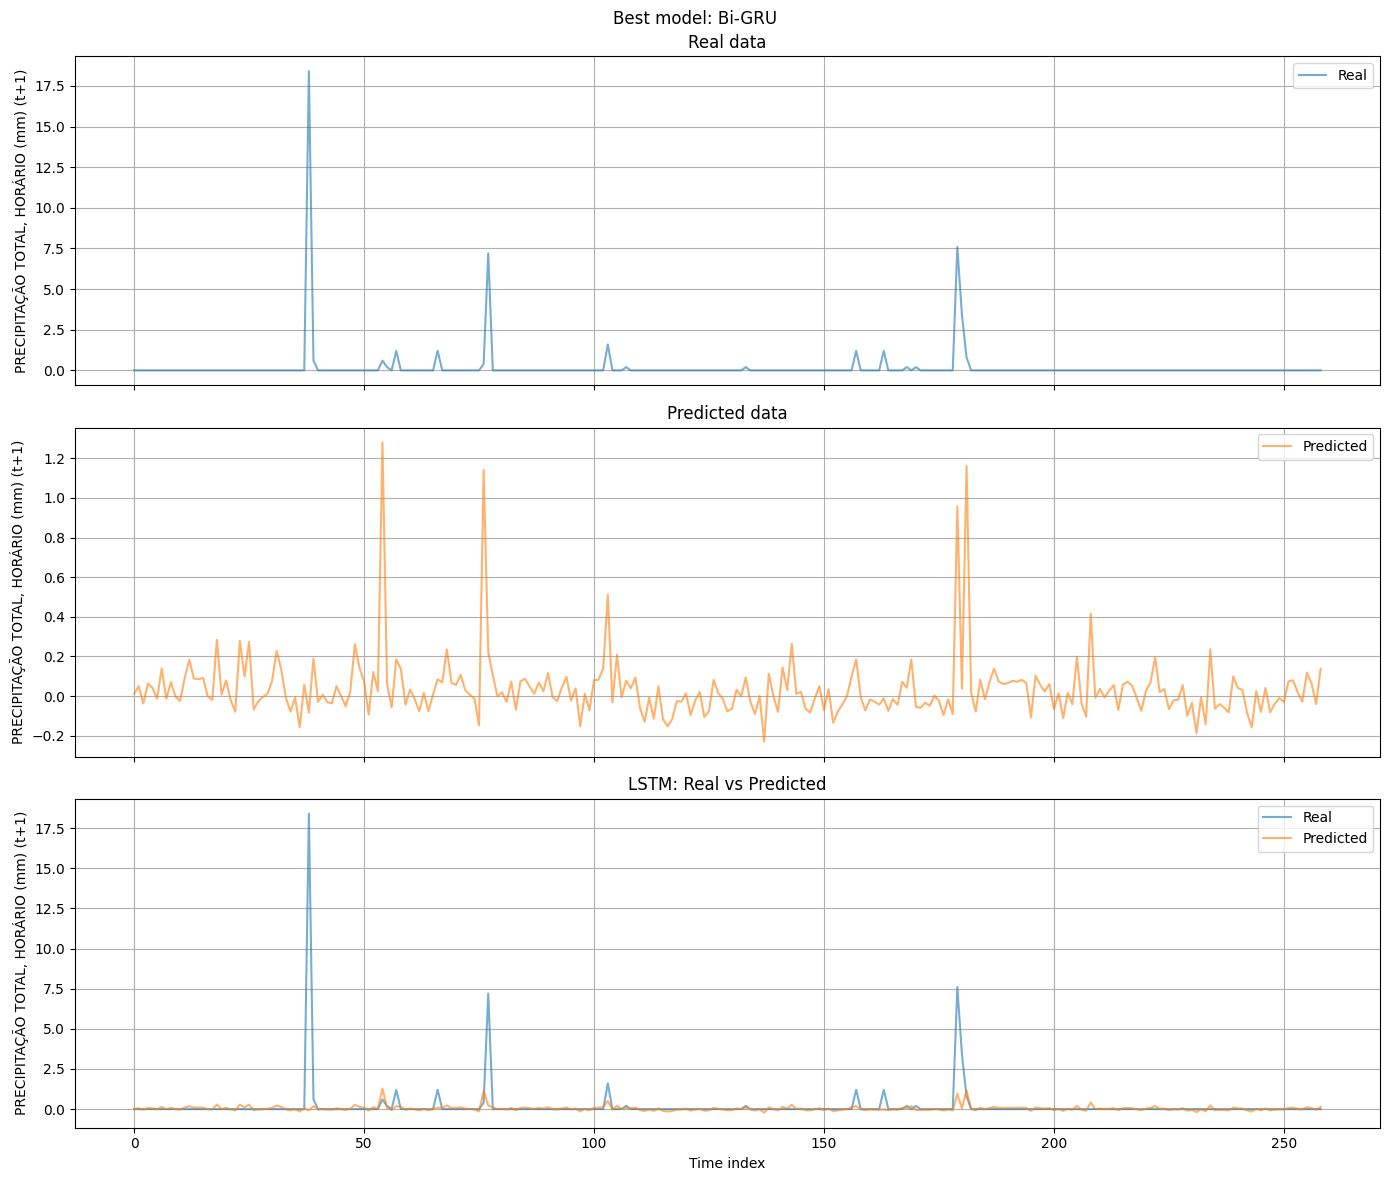

In [ ]:
# --------------------------------------
# Plot best prediction above real data
# --------------------------------------
# Select compatible colors automatically
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
real_color = colors[0]
pred_color = colors[1]

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'Best model: {best_model_name}')

# Real values graph
axs[0].plot(results[best_model_name]["real"], label='Real', alpha=0.6, color=real_color)
axs[0].set_title('Real data')
axs[0].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[0].legend()
axs[0].grid(True)

# Predicted values graph
axs[1].plot(best_preds, label='Predicted', alpha=0.6, color=pred_color)
axs[1].set_title('Predicted data')
axs[1].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[1].legend()
axs[1].grid(True)

# Real x predicted comparison graph
axs[2].plot(results[best_model_name]["real"], label='Real', alpha=0.6, color=real_color)
axs[2].plot(best_preds, label='Predicted', alpha=0.6, color=pred_color)
axs[2].set_title('LSTM: Real vs Predicted')
axs[2].set_xlabel('Time index')
axs[2].set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm) (t+1)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()